# Importing Libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

# Load Dataset

In [91]:
df = pd.read_csv("AI_Impact_on_Jobs_2030.csv")

# EDA

In [92]:
df.head()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
0,Security Guard,45795,28,Master's,0.18,1.28,0.85,High,0.45,0.10,0.46,0.33,0.14,0.65,0.06,0.72,0.94,0.00
1,Research Scientist,133355,20,PhD,0.62,1.11,0.05,Low,0.02,0.52,0.40,0.05,0.97,0.23,0.09,0.62,0.38,0.98
2,Construction Worker,146216,2,High School,0.86,1.18,0.81,High,0.01,0.94,0.56,0.39,0.02,0.23,0.24,0.68,0.61,0.83
3,Software Engineer,136530,13,PhD,0.39,0.68,0.60,Medium,0.43,0.21,0.57,0.03,0.84,0.45,0.40,0.93,0.73,0.33
4,Financial Analyst,70397,22,High School,0.52,1.46,0.64,Medium,0.75,0.54,0.59,0.97,0.61,0.28,0.30,0.17,0.02,0.42


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Job_Title                    3000 non-null   object 
 1   Average_Salary               3000 non-null   int64  
 2   Years_Experience             3000 non-null   int64  
 3   Education_Level              3000 non-null   object 
 4   AI_Exposure_Index            3000 non-null   float64
 5   Tech_Growth_Factor           3000 non-null   float64
 6   Automation_Probability_2030  3000 non-null   float64
 7   Risk_Category                3000 non-null   object 
 8   Skill_1                      3000 non-null   float64
 9   Skill_2                      3000 non-null   float64
 10  Skill_3                      3000 non-null   float64
 11  Skill_4                      3000 non-null   float64
 12  Skill_5                      3000 non-null   float64
 13  Skill_6           

In [94]:
df.describe()

,Average_Salary,Years_Experience,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000
mean,89372.279000,14.677667,0.501283,0.995343,0.501503,0.496973,0.497233,0.499313,0.503667,0.490270,0.499807,0.499160,0.502843,0.501433,0.493627
std,34608.088767,8.739788,0.284004,0.287669,0.247881,0.287888,0.288085,0.288354,0.287063,0.285818,0.286050,0.288044,0.289832,0.285818,0.286464
min,30030.000000,0.000000,0.000000,0.500000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,58640.000000,7.000000,0.260000,0.740000,0.310000,0.240000,0.250000,0.250000,0.260000,0.240000,0.260000,0.250000,0.250000,0.260000,0.250000
50%,89318.000000,15.000000,0.500000,1.000000,0.500000,0.505000,0.500000,0.500000,0.510000,0.490000,0.500000,0.490000,0.500000,0.500000,0.490000
75%,119086.500000,22.000000,0.740000,1.240000,0.700000,0.740000,0.740000,0.750000,0.750000,0.730000,0.740000,0.750000,0.750000,0.740000,0.740000
max,149798.000000,29.000000,1.000000,1.500000,0.950000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
df.dtypes

Job_Title                       object
Average_Salary                   int64
Years_Experience                 int64
Education_Level                 object
AI_Exposure_Index              float64
Tech_Growth_Factor             float64
Automation_Probability_2030    float64
Risk_Category                   object
Skill_1                        float64
Skill_2                        float64
Skill_3                        float64
Skill_4                        float64
Skill_5                        float64
Skill_6                        float64
Skill_7                        float64
Skill_8                        float64
Skill_9                        float64
Skill_10                       float64
dtype: object

In [96]:
df.tail()

,Job_Title,Average_Salary,Years_Experience,Education_Level,AI_Exposure_Index,Tech_Growth_Factor,Automation_Probability_2030,Risk_Category,Skill_1,Skill_2,Skill_3,Skill_4,Skill_5,Skill_6,Skill_7,Skill_8,Skill_9,Skill_10
2995,Doctor,111319,6,Bachelor's,0.24,1.18,0.20,Low,0.73,0.37,0.99,0.07,0.08,0.92,0.65,0.33,0.76,0.45
2996,UX Researcher,44363,29,PhD,0.65,0.74,0.35,Medium,0.23,0.48,0.05,0.88,0.56,0.29,0.69,0.80,0.61,0.20
2997,Data Scientist,61325,23,Master's,0.64,0.94,0.39,Medium,0.28,0.62,0.73,0.21,0.96,0.01,0.70,0.29,0.48,0.57
2998,Graphic Designer,110296,7,PhD,0.95,1.23,0.46,Medium,0.21,0.18,0.14,0.22,0.55,0.68,0.31,0.55,0.34,0.70
2999,Graphic Designer,123909,25,PhD,0.69,0.56,0.49,Medium,0.77,0.54,0.95,0.05,0.29,0.22,0.77,0.52,0.14,0.29


In [97]:
df.shape

(3000, 18)

In [98]:
df.columns

Index(['Job_Title', 'Average_Salary', 'Years_Experience', 'Education_Level',
       'AI_Exposure_Index', 'Tech_Growth_Factor',
       'Automation_Probability_2030', 'Risk_Category', 'Skill_1', 'Skill_2',
       'Skill_3', 'Skill_4', 'Skill_5', 'Skill_6', 'Skill_7', 'Skill_8',
       'Skill_9', 'Skill_10'],
      dtype='object')

# Checking Null Values

In [99]:
df.isnull().sum()

Job_Title                      0
Average_Salary                 0
Years_Experience               0
Education_Level                0
AI_Exposure_Index              0
Tech_Growth_Factor             0
Automation_Probability_2030    0
Risk_Category                  0
Skill_1                        0
Skill_2                        0
Skill_3                        0
Skill_4                        0
Skill_5                        0
Skill_6                        0
Skill_7                        0
Skill_8                        0
Skill_9                        0
Skill_10                       0
dtype: int64

# Identifying Numeric & Categorical Columns

In [100]:
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
cat_cols = df.select_dtypes(include=["object"]).columns

print("Numerical Columns:", num_cols)
print("Categorical Columns:", cat_cols)

Numerical Columns: Index(['Average_Salary', 'Years_Experience', 'AI_Exposure_Index',
       'Tech_Growth_Factor', 'Automation_Probability_2030', 'Skill_1',
       'Skill_2', 'Skill_3', 'Skill_4', 'Skill_5', 'Skill_6', 'Skill_7',
       'Skill_8', 'Skill_9', 'Skill_10'],
      dtype='object')
Categorical Columns: Index(['Job_Title', 'Education_Level', 'Risk_Category'], dtype='object')


# Visualizations

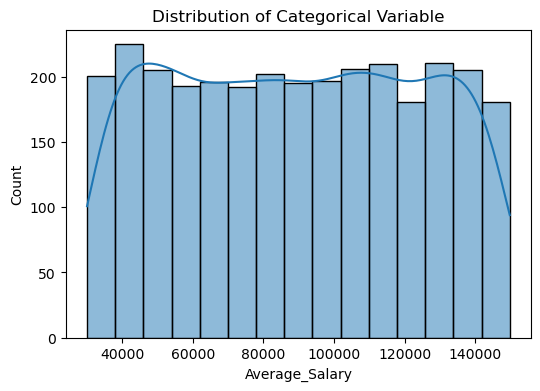

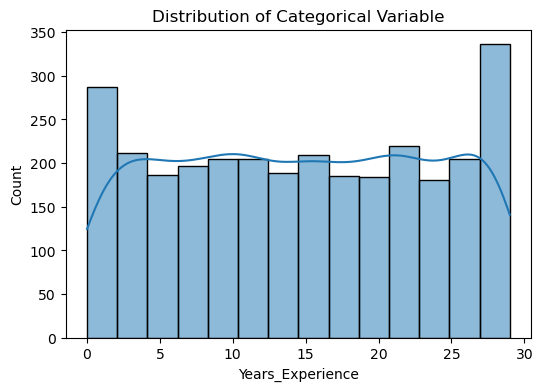

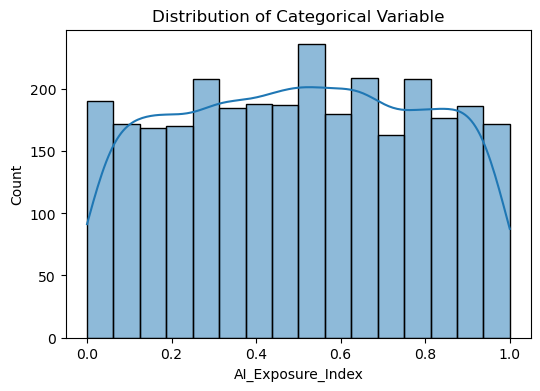

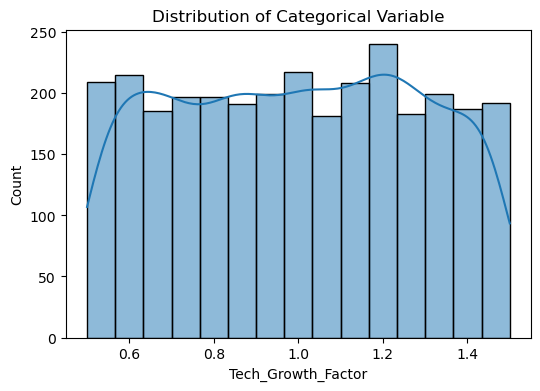

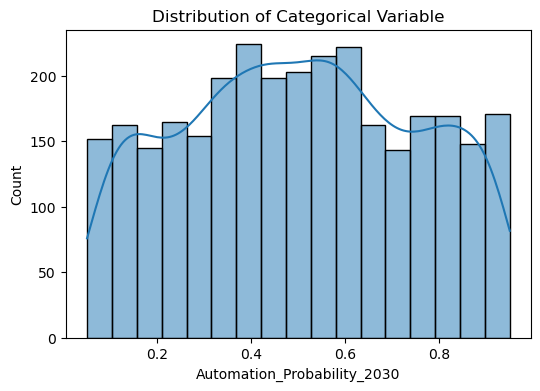

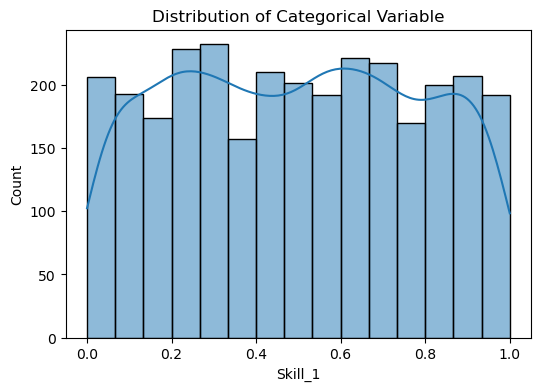

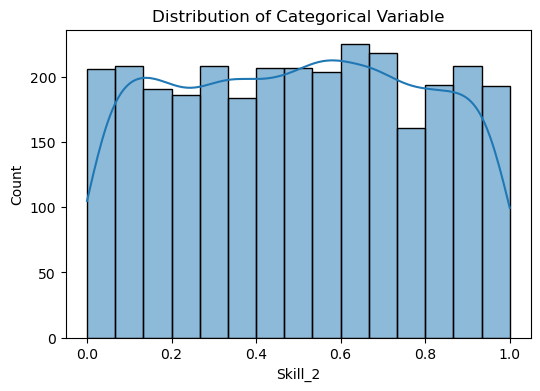

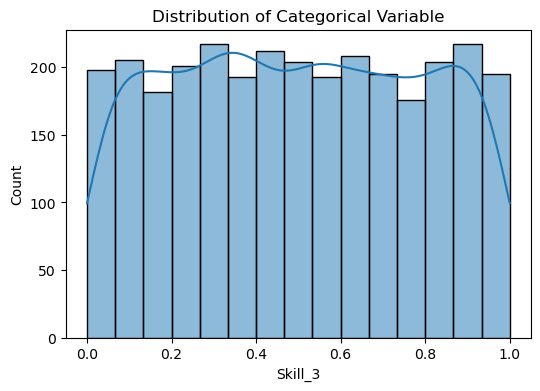

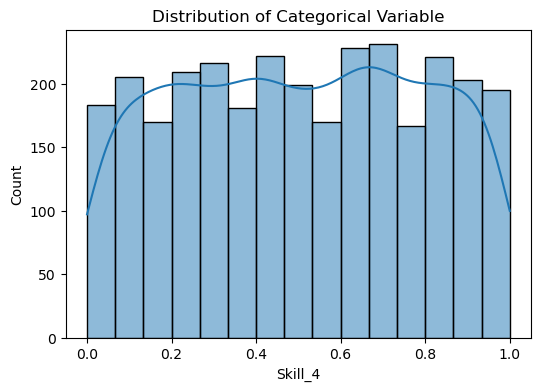

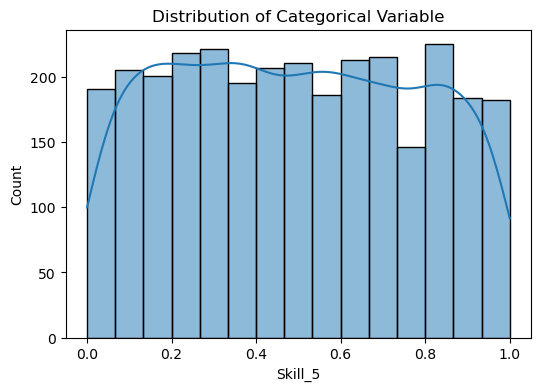

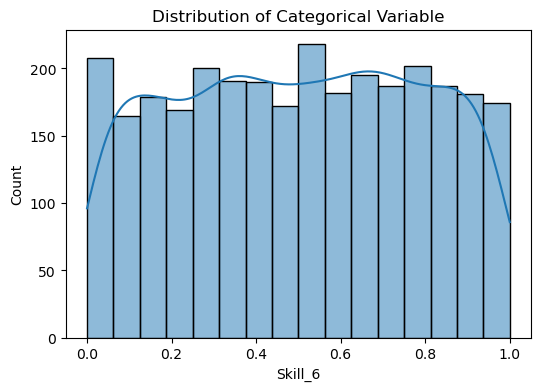

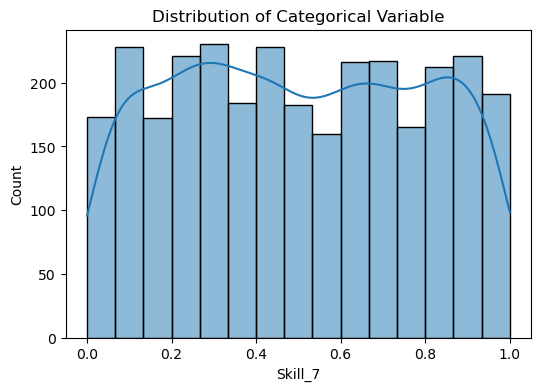

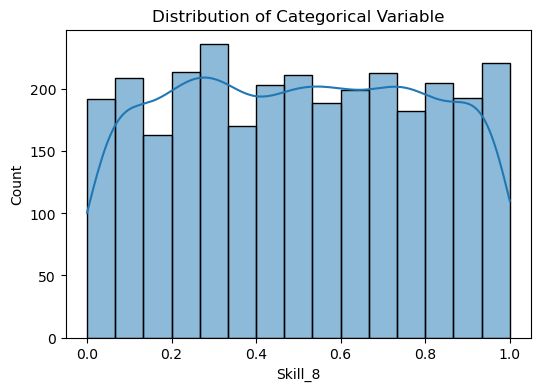

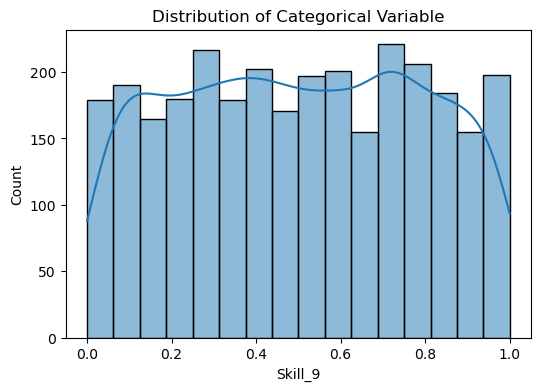

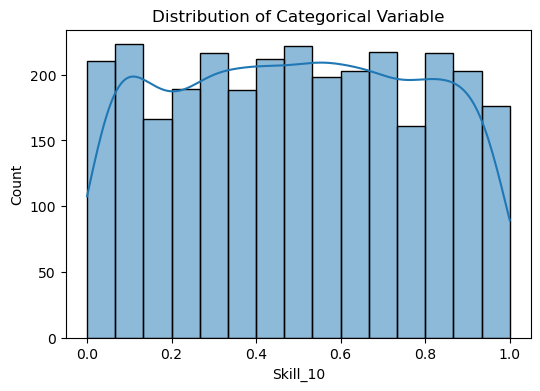

In [101]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(df[col], kde=True)
    plt.title("Distribution of Categorical Variable")
    plt.show()

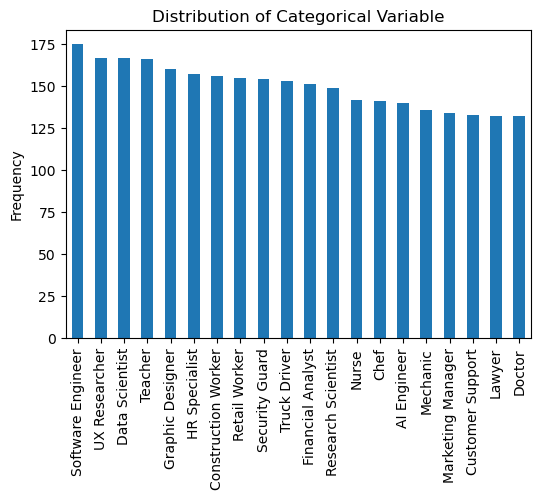

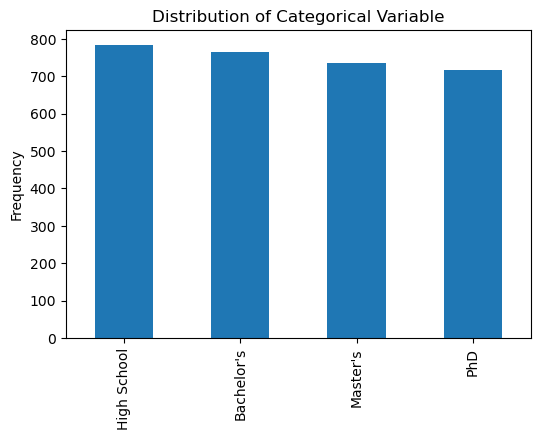

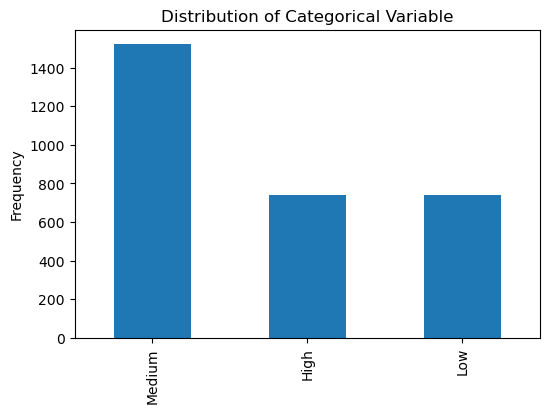

In [102]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind="bar")
    plt.title("Distribution of Categorical Variable")
    plt.ylabel("Frequency")
    plt.show()

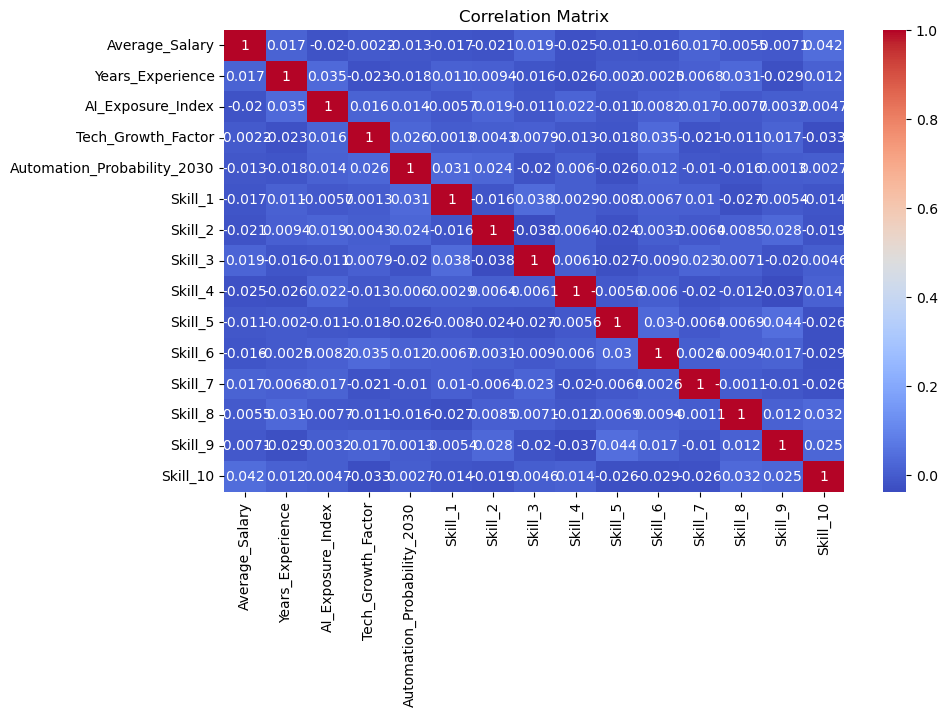

In [103]:
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

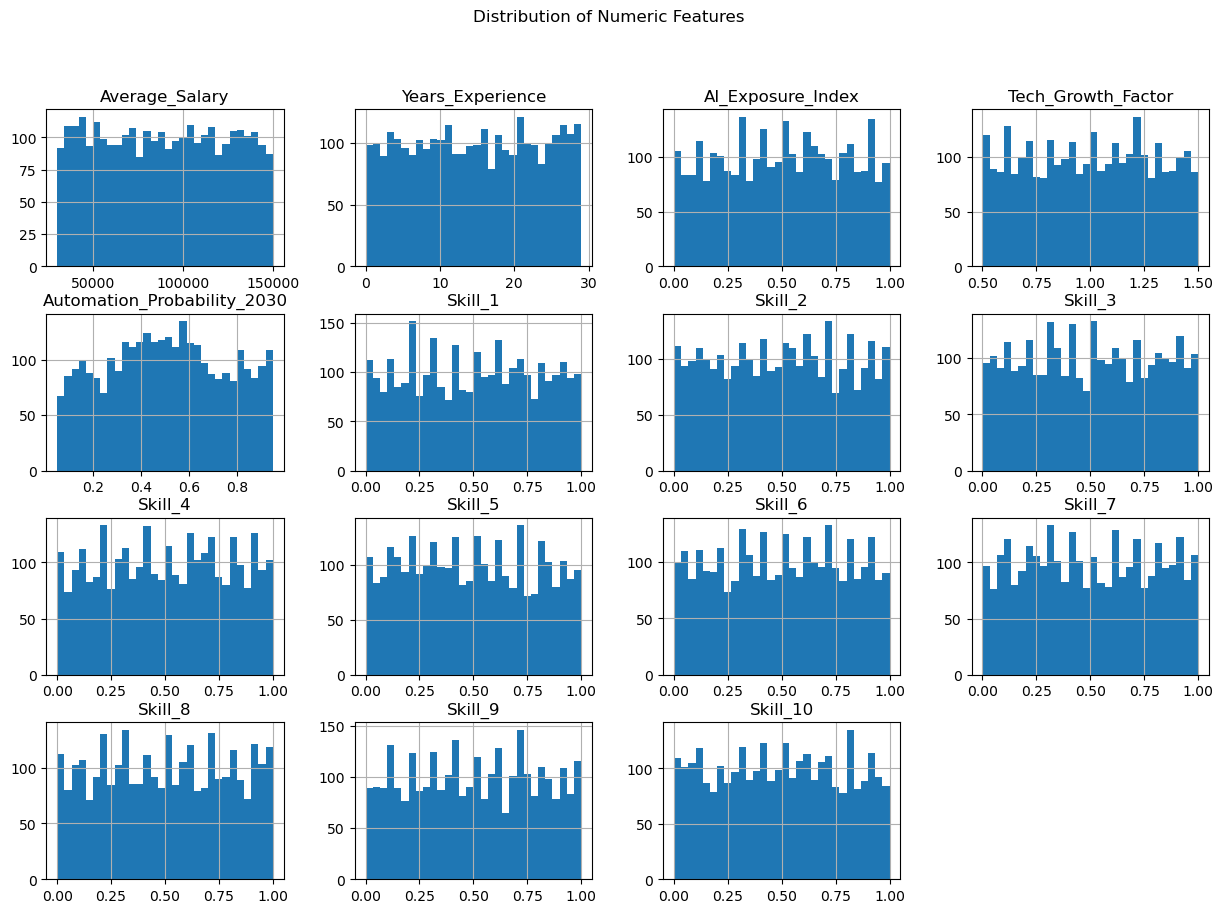

In [104]:
df[num_cols].hist(figsize=(15,10), bins=30)
plt.suptitle("Distribution of Numeric Features")
plt.show()

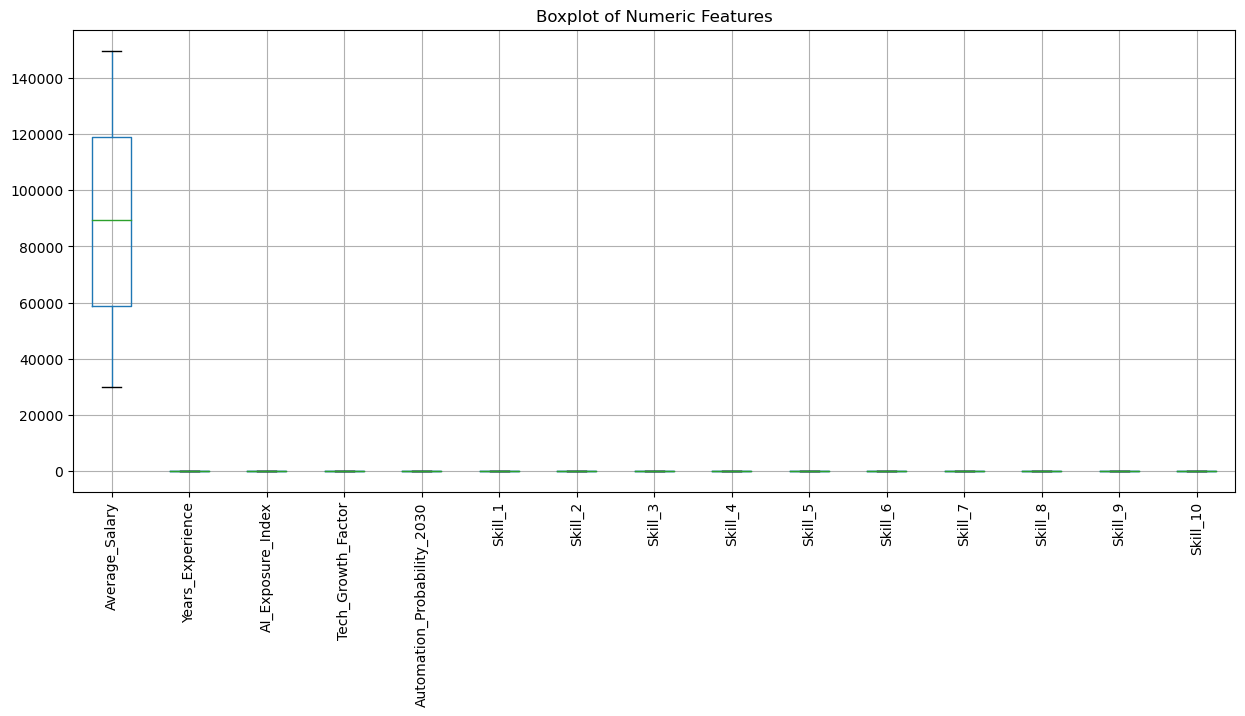

In [105]:
plt.figure(figsize=(15,6))
df[num_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Features")
plt.show()

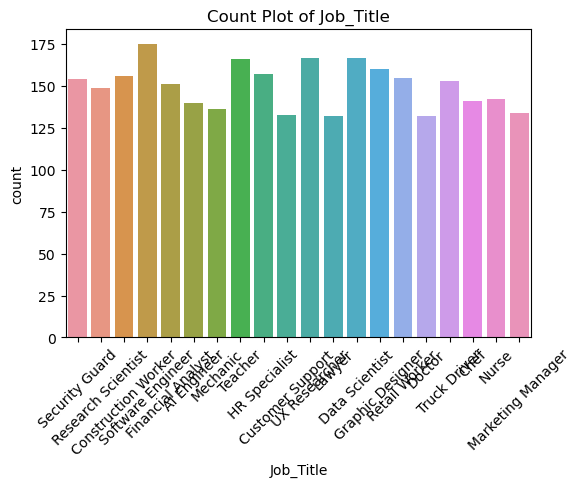

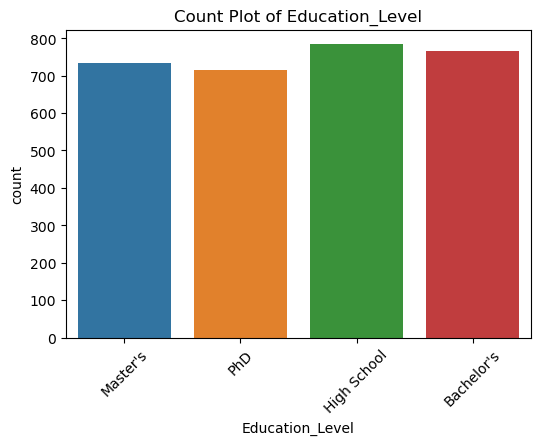

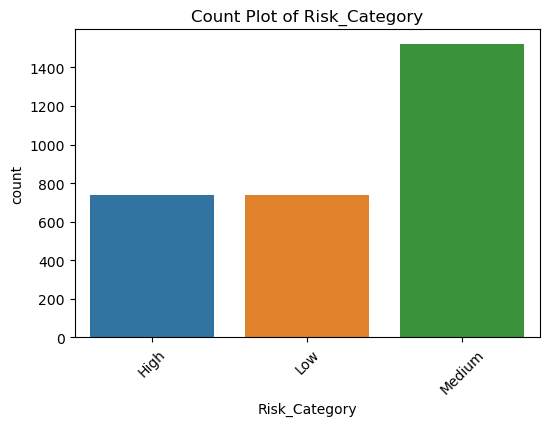

In [106]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.show()

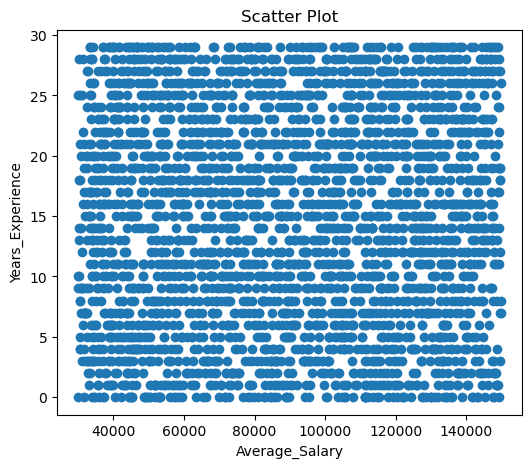

In [107]:
if len(num_cols) >= 2:
    plt.figure(figsize=(6,5))
    plt.scatter(df[num_cols[0]], df[num_cols[1]])
    plt.xlabel(num_cols[0])
    plt.ylabel(num_cols[1])
    plt.title("Scatter Plot")
    plt.show()

# Outlier Detection (IQR Method)
## Detect Outliers

In [108]:
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) |
            (df[num_cols] > (Q3 + 1.5 * IQR)))

outliers.sum()

Average_Salary                 0
Years_Experience               0
AI_Exposure_Index              0
Tech_Growth_Factor             0
Automation_Probability_2030    0
Skill_1                        0
Skill_2                        0
Skill_3                        0
Skill_4                        0
Skill_5                        0
Skill_6                        0
Skill_7                        0
Skill_8                        0
Skill_9                        0
Skill_10                       0
dtype: int64

# Visualize Outliers 

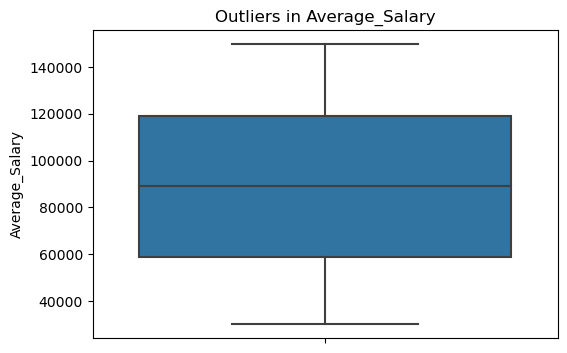

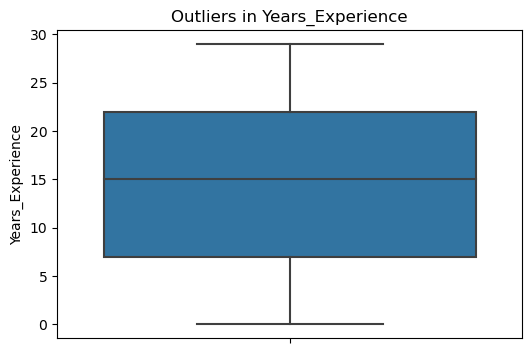

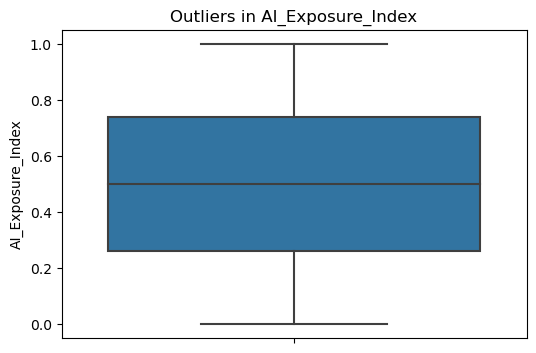

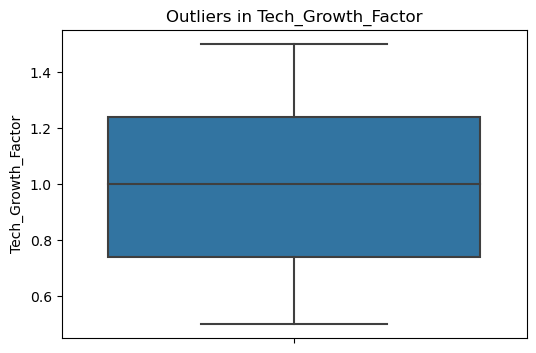

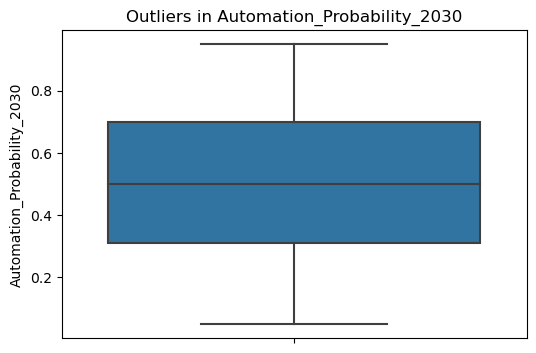

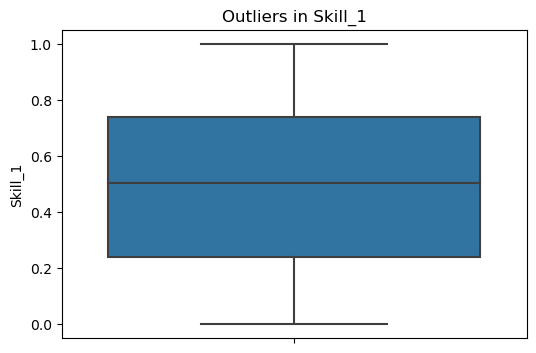

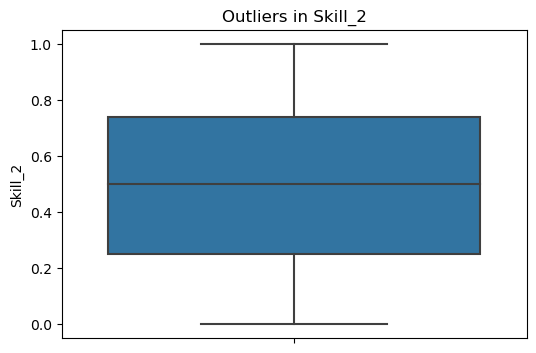

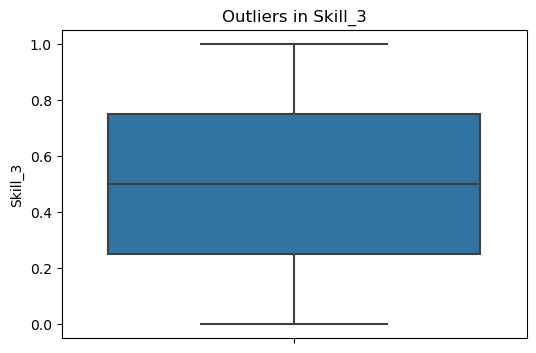

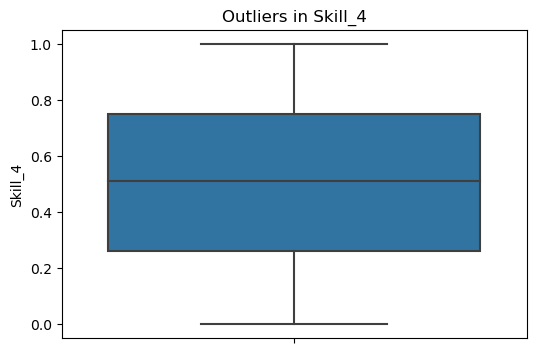

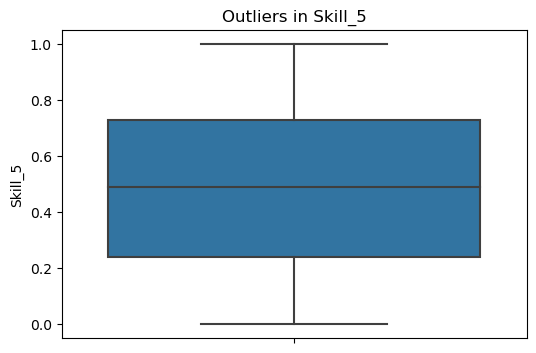

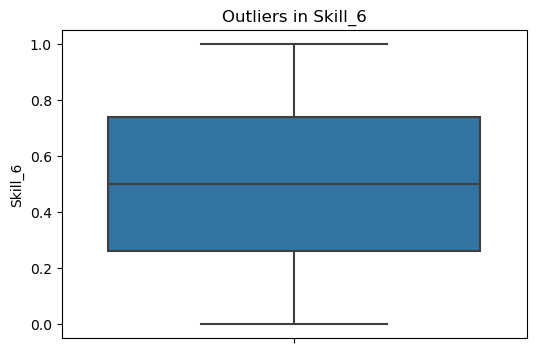

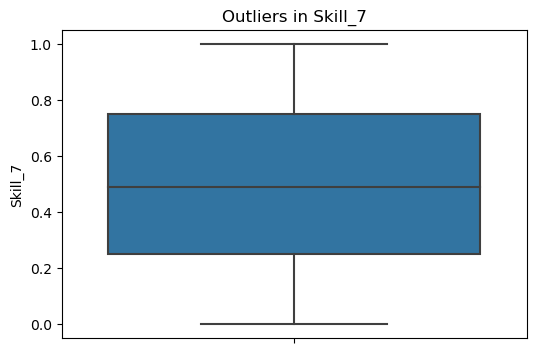

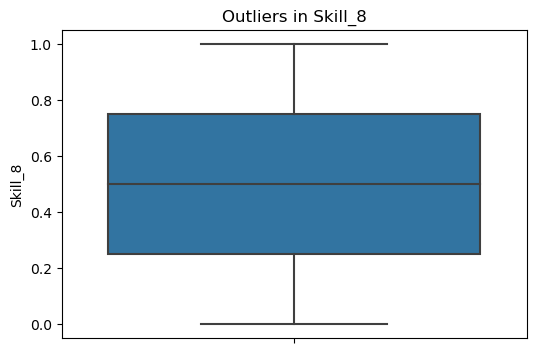

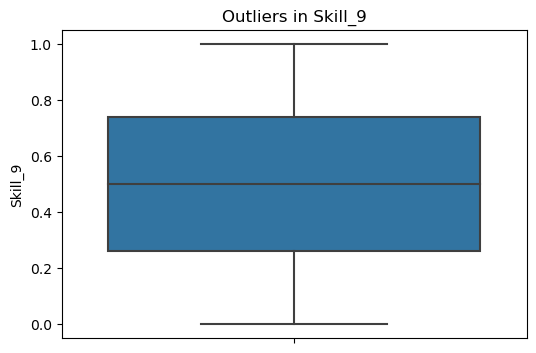

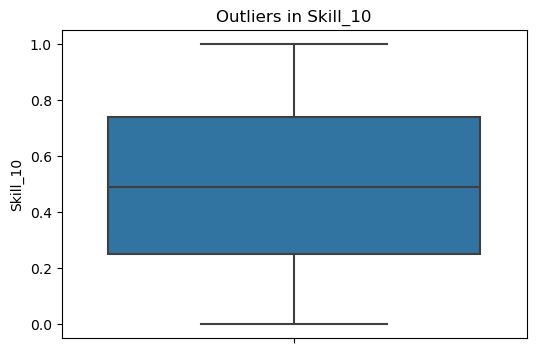

In [109]:
for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()

# Remove Outliers

In [110]:
df_clean = df[~(
    (df[num_cols] < (Q1 - 1.5 * IQR)) |
    (df[num_cols] > (Q3 + 1.5 * IQR))
).any(axis=1)]

In [111]:
print("Original Shape:", df.shape)
print("After Outlier Removal:", df_clean.shape)

Original Shape: (3000, 18)
After Outlier Removal: (3000, 18)


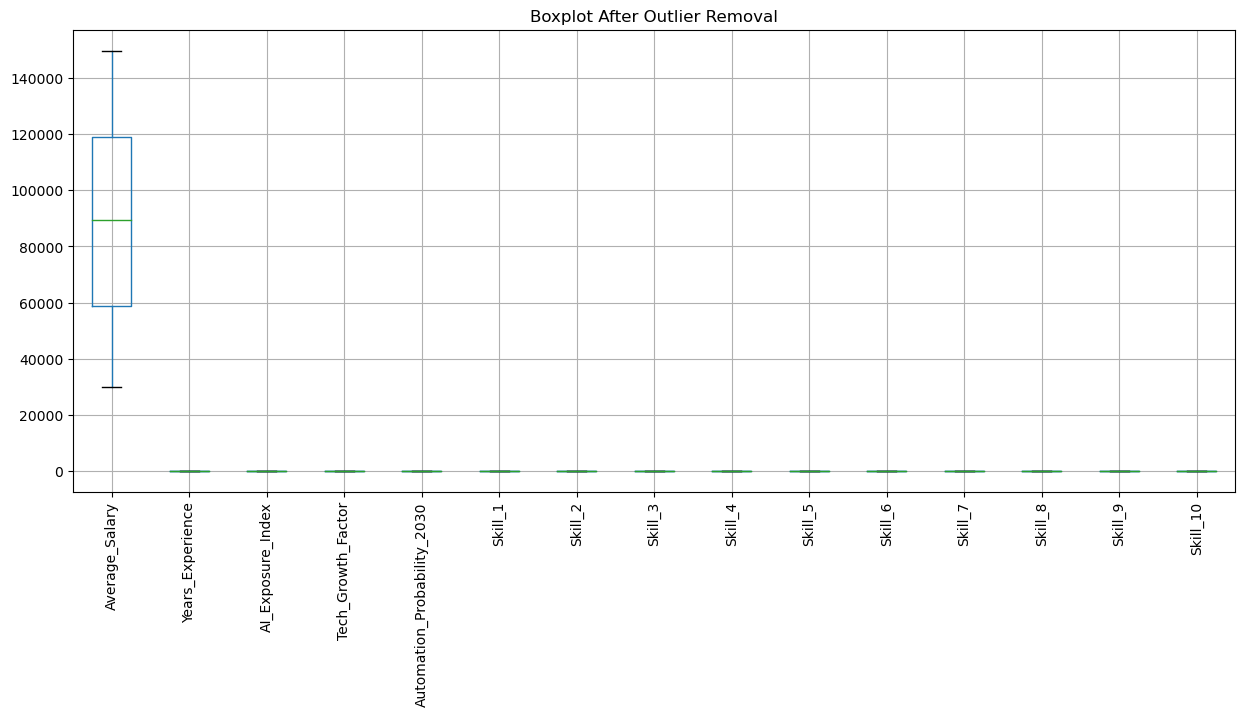

In [112]:
plt.figure(figsize=(15,6))
df_clean[num_cols].boxplot()
plt.xticks(rotation=90)
plt.title("Boxplot After Outlier Removal")
plt.show()

# Label Encoder
### Encode Categorical Columns

In [113]:
le_job = LabelEncoder()
le_edu = LabelEncoder()
le_target = LabelEncoder()

df["Job_Title"] = le_job.fit_transform(df["Job_Title"])
df["Education_Level"] = le_edu.fit_transform(df["Education_Level"])
df["Risk_Category"] = le_target.fit_transform(df["Risk_Category"])

## Feature Extraction

In [114]:
X = df.drop("Risk_Category", axis=1)
y = df["Risk_Category"]

## Train-Test Split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Standard Scaler
### Feature Scaling

In [116]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model-1
### KNN Model
#### Train KNN Model

In [117]:
knn = KNeighborsClassifier(
    n_neighbors=5,
    algorithm="kd_tree"
)

knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='kd_tree')

### Predictions 

In [118]:
y_pred_knn = knn.predict(X_test)

### Evaluation

In [119]:
print("KNN Accuracy Score:", accuracy_score(y_test, y_pred_knn))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_knn))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_knn))

KNN Accuracy Score: 0.6983333333333334

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.60      0.70       167
           1       0.74      0.58      0.65       149
           2       0.64      0.81      0.72       284

    accuracy                           0.70       600
   macro avg       0.73      0.67      0.69       600
weighted avg       0.72      0.70      0.70       600


Confusion Matrix:
[[101   0  66]
 [  0  87  62]
 [ 22  31 231]]


# Model-2
### Naive Bayes Model
#### Train Naive Bayes Model

In [120]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

### Predictions

In [121]:
y_pred_nb = nb_model.predict(X_test)

### Evaluation

In [122]:
print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_nb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_nb))

Naive Bayes Accuracy: 0.98

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98       167
           1       0.99      0.97      0.98       149
           2       0.97      0.99      0.98       284

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600


Confusion Matrix:
[[162   0   5]
 [  0 145   4]
 [  1   2 281]]


# Model-3
### Decision Tree Model
#### Train Decision Tree Model

In [123]:
dt_model = DecisionTreeClassifier(
    max_depth=10,
    random_state=42
)
dt_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

### Predictions

In [124]:
y_pred_dt = dt_model.predict(X_test)

### Evaluation

In [125]:
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

Decision Tree Accuracy: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       167
           1       1.00      1.00      1.00       149
           2       1.00      1.00      1.00       284

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600


Confusion Matrix:
[[167   0   0]
 [  0 149   0]
 [  0   0 284]]


# Model-4
### Support Vector Machine (SVC) Model
#### Train SVC Model

In [126]:
svm_model = SVC(
    kernel="linear",
    C=1.0
)
svm_model.fit(X_train, y_train)

SVC(kernel='linear')

### Predictions

In [127]:
y_pred_svm = svm_model.predict(X_test)

### Evaluation

In [128]:
print("SVM Accuracy:", accuracy_score(y_test, y_pred_svm))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_svm))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))

SVM Accuracy: 0.9883333333333333

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       167
           1       0.99      0.99      0.99       149
           2       0.98      1.00      0.99       284

    accuracy                           0.99       600
   macro avg       0.99      0.99      0.99       600
weighted avg       0.99      0.99      0.99       600


Confusion Matrix:
[[163   0   4]
 [  0 147   2]
 [  0   1 283]]


# Accuracy Comparison Table

In [129]:
accuracy_table = pd.DataFrame({
    "Model": [
        "K-Nearest Neighbors (KNN)",
        "Naive Bayes",
        "Decision Tree",
        "Support Vector Machine (SVM)"
    ],
    "Accuracy": [
        accuracy_score(y_test, y_pred_knn),
        accuracy_score(y_test, y_pred_nb),
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_svm)
    ]
})

accuracy_table

,Model,Accuracy
0,K-Nearest Neighbors (KNN),0.698333
1,Naive Bayes,0.980000
2,Decision Tree,1.000000
3,Support Vector Machine (SVM),0.988333


# Final Model Selection
### Naive Bayes Classifier

In [130]:
final_model = nb_model

### Model Predctions

In [131]:
new_data = X_test[:5]   # sample data
final_predictions = final_model.predict(new_data)
final_predictions

array([2, 0, 2, 2, 2])

### Final Predicted Classes

In [132]:
le_target.inverse_transform(final_predictions)

array(['Medium', 'High', 'Medium', 'Medium', 'Medium'], dtype=object)

### Predict for the Entire test Set

In [133]:
final_predictions = final_model.predict(X_test)
predicted_classes = le_target.inverse_transform(final_predictions)

predicted_classes[:10]   # show first 10

array(['Medium', 'High', 'Medium', 'Medium', 'Medium', 'Low', 'Medium',
       'Medium', 'Low', 'Medium'], dtype=object)

## Donut Chart for Predicted Classes

In [134]:
y_pred = final_model.predict(X_test)
predicted_classes = le_target.inverse_transform(y_pred)
prediction_counts = pd.Series(predicted_classes).value_counts()

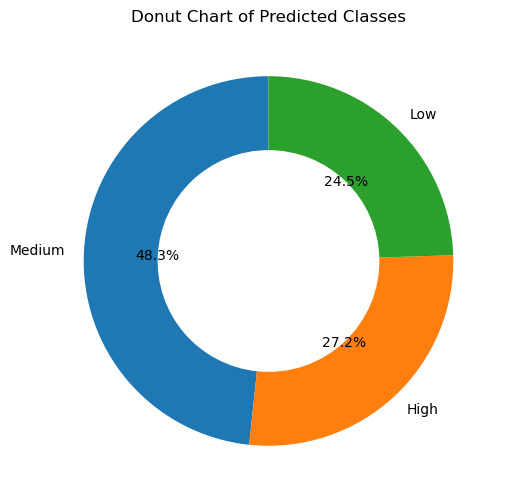

In [136]:
plt.figure(figsize=(6,6))
plt.pie(prediction_counts,
        labels=prediction_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        wedgeprops={'width': 0.4})

plt.title("Donut Chart of Predicted Classes")
plt.show()